In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

In [2]:
df=pd.read_excel('cancer_classification.xlsx')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

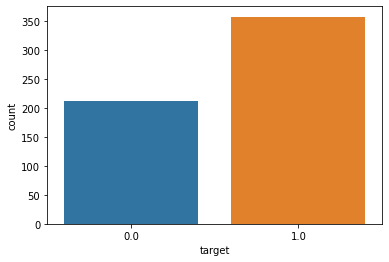

In [5]:
sns.countplot(x='target',data=df)

In [6]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [8]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [9]:
#step1: initialize model
ann=Sequential()

In [10]:
#step2 : input layer
ann.add(Dense(units=30,activation='relu'))
ann.add(Dense(units=15,activation='relu'))
ann.add(Dense(units=1,activation='sigmoid'))
#step3: establish connection
ann.compile(optimizer='adam',loss='binary_crossentropy')#metric parameter not used 
#because we want to plot loss graph
#step4: train model
ann.fit(X_train,Y_train,epochs=600,validation_data=(X_test,Y_test))
#validation_data=checks the performance after each epoch
#step 5 : predict
Y_pred=ann.predict(X_test)

Epoch 1/600
15/15 [==============================] - 2s 27ms/step - loss: 0.7319 - val_loss: 0.6396
Epoch 2/600
15/15 [==============================] - 0s 7ms/step - loss: 0.5650 - val_loss: 0.5280
Epoch 3/600
15/15 [==============================] - 0s 6ms/step - loss: 0.4561 - val_loss: 0.4377
Epoch 4/600
15/15 [==============================] - 0s 6ms/step - loss: 0.3725 - val_loss: 0.3632
Epoch 5/600
15/15 [==============================] - 0s 7ms/step - loss: 0.3011 - val_loss: 0.2958
Epoch 6/600
15/15 [==============================] - 0s 5ms/step - loss: 0.2382 - val_loss: 0.2403
Epoch 7/600
15/15 [==============================] - 0s 5ms/step - loss: 0.1872 - val_loss: 0.2009
Epoch 8/600
15/15 [==============================] - 0s 9ms/step - loss: 0.1509 - val_loss: 0.1733
Epoch 9/600
15/15 [==============================] - 0s 5ms/step - loss: 0.1264 - val_loss: 0.1540
Epoch 10/600
15/15 [==============================] - 0s 5ms/step - loss: 0.1089 - val_loss: 0.1386
Epoch 11

In [11]:
#never restart the kernel while running,accuracy might be different

In [12]:
#step6: set threshold
Y_pred=Y_pred>0.5

In [13]:
lossdf=pd.DataFrame(ann.history.history) #store loss in df
lossdf.head()

""


In [14]:
#low training error:low bias
#high testing error:high variance
#overfitting  training<testing error

In [15]:
#regularization
#EarlyStopping: helps to stop at minimum error

In [16]:
ann=Sequential()
ann.add(Dense(units=30,activation='relu'))
ann.add(Dense(units=15,activation='relu'))
ann.add(Dense(units=1,activation='sigmoid'))
ann.compile(optimizer='adam',loss='binary_crossentropy')

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
es=EarlyStopping(monitor='val_loss',mode="min",verbose=1,patience=25)
#verbose:0 means silent 1 means display when callbacks takes
#action
#patience:no. of epochs with no improvement after which 
#training will be stopped

In [19]:
ann.fit(X_train,Y_train,epochs=600,validation_data=(X_test,Y_test),callbacks=[es])

Epoch 1/600
15/15 [==============================] - 2s 18ms/step - loss: 0.6695 - val_loss: 0.5270
Epoch 2/600
15/15 [==============================] - 0s 6ms/step - loss: 0.4408 - val_loss: 0.3888
Epoch 3/600
15/15 [==============================] - 0s 5ms/step - loss: 0.3077 - val_loss: 0.3002
Epoch 4/600
15/15 [==============================] - 0s 5ms/step - loss: 0.2250 - val_loss: 0.2404
Epoch 5/600
15/15 [==============================] - 0s 5ms/step - loss: 0.1723 - val_loss: 0.2005
Epoch 6/600
15/15 [==============================] - 0s 5ms/step - loss: 0.1416 - val_loss: 0.1726
Epoch 7/600
15/15 [==============================] - 0s 5ms/step - loss: 0.1214 - val_loss: 0.1538
Epoch 8/600
15/15 [==============================] - 0s 5ms/step - loss: 0.1072 - val_loss: 0.1412
Epoch 9/600
15/15 [==============================] - 0s 6ms/step - loss: 0.0970 - val_loss: 0.1295
Epoch 10/600
15/15 [==============================] - 0s 7ms/step - loss: 0.0881 - val_loss: 0.1201
Epoch 11

In [20]:
lossdf=pd.DataFrame(ann.history.history)
lossdf.head()

,loss,val_loss
0,0.669528,0.527004
1,0.440757,0.388837
2,0.307747,0.300186
3,0.225018,0.240379
4,0.172326,0.200505


In [21]:
lossdf.tail()

,loss,val_loss
45,0.020455,0.095135
46,0.019551,0.095074
47,0.018709,0.095766
48,0.018061,0.098107
49,0.017412,0.098770


<AxesSubplot:>

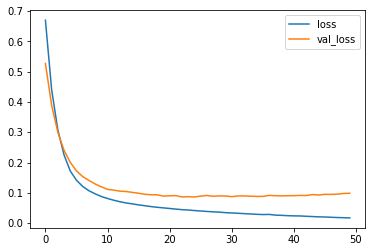

In [22]:
lossdf.plot()

In [23]:
#dropout
#regularization
from tensorflow.keras.layers import Dropout
#referrs to dropping out of nodes in neural network
#it reduces overfitting

In [24]:
ann=Sequential()
ann.add(Dense(units=30,activation='relu'))
ann.add(Dropout(rate=0.5))
ann.add(Dense(units=15,activation='relu'))
ann.add(Dropout(rate=0.5))
#dropout to be addded after hidden layer not after output
ann.add(Dense(units=1,activation='sigmoid'))
ann.compile(optimizer='adam',loss='binary_crossentropy')


In [25]:
ann.fit(X_train,Y_train,epochs=600,validation_data=(X_test,Y_test),callbacks=[es])

Epoch 1/600
15/15 [==============================] - 1s 18ms/step - loss: 0.6626 - val_loss: 0.5807
Epoch 2/600
15/15 [==============================] - 0s 5ms/step - loss: 0.5911 - val_loss: 0.4912
Epoch 3/600
15/15 [==============================] - 0s 5ms/step - loss: 0.4767 - val_loss: 0.4188
Epoch 4/600
15/15 [==============================] - 0s 5ms/step - loss: 0.4278 - val_loss: 0.3623
Epoch 5/600
15/15 [==============================] - 0s 5ms/step - loss: 0.3788 - val_loss: 0.3190
Epoch 6/600
15/15 [==============================] - 0s 5ms/step - loss: 0.3551 - val_loss: 0.2831
Epoch 7/600
15/15 [==============================] - 0s 5ms/step - loss: 0.3141 - val_loss: 0.2529
Epoch 8/600
15/15 [==============================] - 0s 5ms/step - loss: 0.2822 - val_loss: 0.2278
Epoch 9/600
15/15 [==============================] - 0s 5ms/step - loss: 0.2516 - val_loss: 0.2065
Epoch 10/600
15/15 [==============================] - 0s 4ms/step - loss: 0.2446 - val_loss: 0.1895
Epoch 11

<AxesSubplot:>

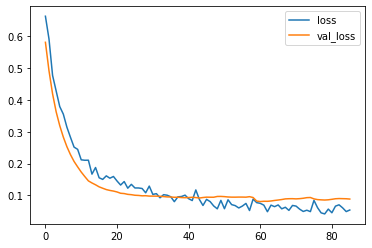

In [26]:
lossdf=pd.DataFrame(ann.history.history)
lossdf.plot()

In [27]:
Y_pred=ann.predict(X_test)
    

4/4 [==============================] - 0s 2ms/step


In [28]:
Y_pred=Y_pred>0.5

In [29]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98        42
         1.0       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

